#source: https://people.sc.fsu.edu/~jburkardt/py_src/lorenz_ode/lorenz_ode.html
#scholar: http://journals.ametsoc.org/doi/pdf/10.1175/1520-0469(1963)020%3C0130:DNF%3E2.0.CO;2

24.7368421053
[ -1.36666667e+01+0.j           6.66133815e-16+9.62453006j
   6.66133815e-16-9.62453006j]


C:\Python35\lib\site-packages\ipykernel_launcher.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Python35\lib\site-packages\ipykernel_launcher.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Python35\lib\site-packages\ipykernel_launcher.py:105: ComplexWarning: Casting complex values to real discards the imaginary part


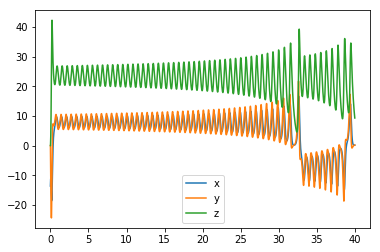

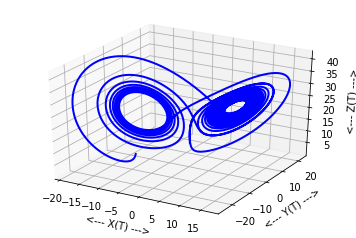

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

def lorenz_rhs ( t, m, xyz ):

	omega = 10
	b = 8/3

	rho = omega*(omega+b+3)*np.power((omega-b-1),-1)

	dxdt = np.zeros ( 3 )

	dxdt[0] = omega * ( xyz[1] - xyz[0] )
	dxdt[1] = xyz[0] * ( rho - xyz[2] ) - xyz[1]
	dxdt[2] = xyz[0] * xyz[1] - b * xyz[2]

	return dxdt

def rk4vec ( t0, m, u0, dt, f ):

	#*****************************************************************************80
	#
	## RK4VEC takes one Runge-Kutta step for a vector ODE.
	#
	#  Licensing:
	#
	#    This code is distributed under the GNU LGPL license. 
	#
	#  Modified:
	#
	#    24 May 2016
	#
	#  Author:
	#
	#    John Burkardt
	#
	#  Parameters:
	#
	#    Input, real T0, the current time.
	#
	#    Input, integer M, the spatial dimension.
	#
	#    Input, real U0(M), the solution estimate at the current time.
	#
	#    Input, real DT, the time step.
	#
	#    Input, function uprime = F ( t, m, u  ) 
	#    which evaluates the derivative UPRIME(1:M) given the time T and
	#    solution vector U(1:M).
	#
	#    Output, real U(M), the fourth-order Runge-Kutta solution 
	#    estimate at time T0+DT.
	#
	#  Get four sample values of the derivative.
	#
	f0 = f ( t0, m, u0 )

	t1 = t0 + dt / 2.0
	u1 = u0 + dt * f0 / 2.0
	f1 = f ( t1, m, u1 )

	t2 = t0 + dt / 2.0
	u2 = u0 + dt * f1 / 2.0
	f2 = f ( t2, m, u2 )

	t3 = t0 + dt
	u3 = u0 + dt * f2
	f3 = f ( t1, m, u1 )
	#
	#  Combine them to estimate the solution U at time T1.
	#
	u = u0 + dt * ( f0 + 2.0 * f1 + 2.0 * f2 + f3 ) / 6.0

	return u
	
def main():	
	
	omega = 10
	a_root = .5
	b = 8/3

	r = omega*(omega+b+3)*np.power((omega-b-1),-1)
	print(r)
	roots = np.roots([1.,(omega+b+1),(r+omega)*b,2*omega*b*(r-1)])
	print(roots)

	n = 100000
	t_final = 40.
	dt = t_final/n


	t = np.linspace ( 0.0, t_final, n + 1 )

	x = np.zeros ( n + 1 )
	y = np.zeros ( n + 1 )
	z = np.zeros ( n + 1 )

	#x[0] = 8.0
	#y[0] = 1.0
	#z[0] = 1.0
	x[0] = roots[0]
	y[0] = roots[1]
	z[0] = roots[2]


	for j in range ( 0, n ):

		xyz = np.array ( [ x[j], y[j], z[j] ] )
		xyz = rk4vec ( t[j], 3, xyz, dt, lorenz_rhs )

		x[j+1] = xyz[0]
		y[j+1] = xyz[1]
		z[j+1] = xyz[2]

	plt.plot(t,x)
	plt.plot(t,y)
	plt.plot(t,z)
	plt.legend(['x','y','z'])
	plt.show()
		
	fig = plt.figure ( )
	ax = fig.gca ( projection = '3d' )
	ax.plot ( x, y, z, linewidth = 2, color = 'b' )
	ax.grid ( True )
	ax.set_xlabel ( '<--- X(T) --->' )
	ax.set_ylabel ( '<--- Y(T) --->' )
	ax.set_zlabel ( '<--- Z(T) --->' )	
	plt.show()

main()
    